In [3]:
suppressMessages(library(ArchR))
library(SummarizedExperiment)
library(dplyr)
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [4]:
PROJDIR='/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/tidy_data/ArchRProjects'
projM = loadArchRProject(file.path(PROJDIR,'Rat_Transgen_NAc_multiome'), showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
file_path = "/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/differential_Motifs_data/differential_MotifMatrix.Astrocytes.rds"
cell_type = "Astrocytes"
#summarize_astro <- read_summarized_experiment(file_path, cell_type)

In [32]:
#combined_diff_motifs

In [5]:
astro_motif <- readRDS("/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/differential_Motifs_data/differential_MotifMatrix.Astrocytes.rds")
astro_motif

$Cocaine_v_Saline
class: SummarizedExperiment 
dim: 884 1 
metadata(2): MatchInfo Params
assays(6): Mean FDR ... AUC MeanBGD
rownames(884): 1 2 ... 883 884
rowData names(3): seqnames idx name
colnames(1): Cocaine
colData names(0):

$Meth_v_Saline
class: SummarizedExperiment 
dim: 884 1 
metadata(2): MatchInfo Params
assays(6): Mean FDR ... AUC MeanBGD
rownames(884): 1 2 ... 883 884
rowData names(3): seqnames idx name
colnames(1): Methamphetamine
colData names(0):

$Meth_v_Cocaine
class: SummarizedExperiment 
dim: 884 1 
metadata(2): MatchInfo Params
assays(6): Mean FDR ... AUC MeanBGD
rownames(884): 1 2 ... 883 884
rowData names(3): seqnames idx name
colnames(1): Methamphetamine
colData names(0):


In [6]:
#astro_motif <- SummarizedExperiment(astro_motif)
class(astro_motif[1])
astro_motif1 <- astro_motif[[3]]
class(astro_motif1)
colnames(astro_motif1)
names(astro_motif[1])


[1] "list"

[1] "SummarizedExperiment"
attr(,"package")
[1] "SummarizedExperiment"

[1] "Methamphetamine"

[1] "Cocaine_v_Saline"

In [7]:
astro1 <- getMarkers(astro_motif[[3]], cutOff = "FDR <= 0.1")
idx_name <-names(astro1)
astro1[[idx_name]]


DataFrame with 0 rows and 5 columns

In [8]:
library(stringr)

In [9]:
# Set the path to a single .rds file
rds_file <- "/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/differential_Motifs_data/differential_MotifMatrix.Astrocytes.rds"

# Read the .rds file containing the SummarizedExperiment objects into a list
rds_list <- readRDS(rds_file)

# Extract the cell type name from the file name
cell_type <- str_replace(basename(rds_file), "differential_MotifMatrix\\.(.*)\\.rds", "\\1")

# Process each SummarizedExperiment object and store the resulting data frames in a list
df_list <- lapply(seq_along(rds_list), function(i) {
  # Get the condition name
  cond <- names(rds_list)[i]
  
  # Filter the SummarizedExperiment object based on FDR <= 0.1
  filtered <- getMarkers(rds_list[[i]], cutOff = "FDR <= 0.1")
  
  #Get the name of the specific condition
  name <- names(filtered)
  #print(name)
    # Get the data frame using the condition name
  filtered_df <- filtered[[name]]
  #print(filtered_df)
    
  # Convert the DataFrame object to a regular data.frame
  filtered_df <- as.data.frame(filtered_df)
  
  # Add columns with cell type and condition information using mutate()
  filtered_df <- filtered_df %>%
  mutate(CellType = cell_type, Condition = cond)
  
  return(filtered_df)
})

# Combine the resulting data frames into one large data frame
combined_df <- bind_rows(df_list)

# Print the resulting data frame
print(combined_df)

            seqnames idx          name          FDR     MeanDiff   CellType
146...1   deviations 146      Ctcf_146 8.373426e-04  0.028717617 Astrocytes
820...2   deviations 820     Ctcfl_820 2.760328e-03  0.025354288 Astrocytes
327...3   deviations 327     Foxd3_327 6.728753e-02  0.022232203 Astrocytes
328...4   deviations 328     Foxe1_328 6.728753e-02  0.022232203 Astrocytes
341...5   deviations 341    Gm5294_341 6.728753e-02  0.022232203 Astrocytes
366...6   deviations 366     Foxl1_366 6.728753e-02  0.022232203 Astrocytes
142...7   deviations 142       Sp1_142 8.797511e-02  0.018514627 Astrocytes
218...8   deviations 218    Zfp105_218 8.797511e-02  0.021793052 Astrocytes
281...9   deviations 281      Elf5_281 8.797511e-02  0.019761283 Astrocytes
305...10  deviations 305     Foxj1_305 8.797511e-02  0.024355887 Astrocytes
325       deviations 325     Foxb2_325 8.797511e-02  0.024425558 Astrocytes
326       deviations 326     Foxb1_326 8.797511e-02  0.024425558 Astrocytes
331       de

In [18]:


# List all .rds files in the specified directory
file_path <- "/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/differential_Motifs_data"
rds_files <- list.files(file_path, pattern = "^differential.*\\.rds$", full.names = TRUE)

# Function to process a single .rds file
process_rds_file <- function(rds_file) {
  # Read the .rds file containing the SummarizedExperiment objects into a list
  rds_list <- readRDS(rds_file)

  # Extract the cell type name from the file name
  cell_type <- str_replace(basename(rds_file), "differential_MotifMatrix\\.(.*)\\.rds", "\\1")

  # Process each SummarizedExperiment object and store the resulting data frames in a list
  df_list <- lapply(seq_along(rds_list), function(i) {
    # Get the condition name
    cond <- names(rds_list)[i]
    
    # Filter the SummarizedExperiment object based on FDR <= 0.1
    filtered <- getMarkers(rds_list[[i]], cutOff = "FDR <= 1")
    
    # Get the name of the specific condition
    name <- names(filtered)

    # Get the data frame using the condition name
    filtered_df <- filtered[[name]]

    # Convert the DataFrame object to a regular data.frame
    filtered_df <- as.data.frame(filtered_df)

    # Add columns with cell type and condition information using mutate()
    filtered_df <- filtered_df %>%
      mutate(CellType = cell_type, Condition = cond)

    return(filtered_df)
  })

  # Combine the resulting data frames into one large data frame
  combined_df <- bind_rows(df_list)
  
  return(combined_df)
}

# Process all .rds files and store the resulting data frames in a list
all_df_list <- lapply(rds_files, process_rds_file)

# Combine all data frames into a single large data frame
final_combined_df <- bind_rows(all_df_list)

# Print the final combined data frame
head(final_combined_df)


seqnames   idx name       FDR          MeanDiff   CellType  
146...1 deviations 146 Ctcf_146   0.0008373426 0.02871762 Astrocytes
820...2 deviations 820 Ctcfl_820  0.0027603276 0.02535429 Astrocytes
327...3 deviations 327 Foxd3_327  0.0672875348 0.02223220 Astrocytes
328...4 deviations 328 Foxe1_328  0.0672875348 0.02223220 Astrocytes
341...5 deviations 341 Gm5294_341 0.0672875348 0.02223220 Astrocytes
366...6 deviations 366 Foxl1_366  0.0672875348 0.02223220 Astrocytes
        Condition       
146...1 Cocaine_v_Saline
820...2 Cocaine_v_Saline
327...3 Cocaine_v_Saline
328...4 Cocaine_v_Saline
341...5 Cocaine_v_Saline
366...6 Cocaine_v_Saline

In [6]:
saveDir = "/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/differential_Motifs_data"
path = file.path(saveDir, paste0('combined_MotifMatrix.rds'))
saveRDS(final_combined_df, path)

In [5]:
corr_matrix <- readRDS("/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/tidy_data/differential_expression/rdas/correlationMatrix.rds")

In [6]:
final_combined_motif <- readRDS("/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/differential_Motifs_data/combined_MotifMatrix.rds")

In [17]:
head(final_combined_motif)


celltype   group      TF      Mean         FDR       Pval       MeanDiff    
1 Astrocytes Coc_vs_Sal Tcfap2a 0.0034330703 0.8737479 0.73798211 -0.001227962
2 Astrocytes Coc_vs_Sal Tcfap2b 0.0095635579 0.7050235 0.31210956 -0.010897445
3 Astrocytes Coc_vs_Sal Tcfap2c 0.0082008931 0.4869649 0.09611973 -0.011835868
4 Astrocytes Coc_vs_Sal Tcfap2e 0.0003798668 0.5324746 0.12049592  0.006722020
5 Astrocytes Coc_vs_Sal Tcfap2d 0.0204191476 0.4552295 0.07633789  0.011086326
6 Astrocytes Coc_vs_Sal Arid3b  0.0264870730 0.3509661 0.04052629  0.017679396
  AUC       MeanBGD     
1 0.4884943  0.004661033
2 0.4652847  0.020461003
3 0.4428685  0.020036761
4 0.5533128 -0.006342153
5 0.5608510  0.009332821
6 0.5703233  0.008807677

In [19]:
filtered_combined_df <- subset(final_combined_df, FDR <= 0.1)
filtered_combined_df

seqnames   idx name                   FDR          MeanDiff    
146...1     deviations 146 Ctcf_146               8.373426e-04  0.028717617
820...2     deviations 820 Ctcfl_820              2.760328e-03  0.025354288
327...3     deviations 327 Foxd3_327              6.728753e-02  0.022232203
328...4     deviations 328 Foxe1_328              6.728753e-02  0.022232203
341...5     deviations 341 Gm5294_341             6.728753e-02  0.022232203
366...6     deviations 366 Foxl1_366              6.728753e-02  0.022232203
142...7     deviations 142 Sp1_142                8.797511e-02  0.018514627
218...8     deviations 218 Zfp105_218             8.797511e-02  0.021793052
281...9     deviations 281 Elf5_281               8.797511e-02  0.019761283
305...10    deviations 305 Foxj1_305              8.797511e-02  0.024355887
325...11    deviations 325 Foxb2_325              8.797511e-02  0.024425558
326...12    deviations 326 Foxb1_326              8.797511e-02  0.024425558
331...13    deviations 331 Gm5294_331             8.797511e-02  0.029501762
335...14    deviations 335 Gm5294_335             8.797511e-02  0.024355887
354...15    deviations 354 Foxl1_354              8.797511e-02  0.029501762
357...16    deviations 357 Foxl1_357              8.797511e-02  0.024355887
631...17    deviations 631 Irf1_631               8.797511e-02  0.016021409
800...18    deviations 800 Zfp148_800             8.797511e-02  0.008436057
811...19    deviations 811 Zfp384_811             8.797511e-02  0.027299365
831...20    deviations 831 Foxa3_831              8.797511e-02  0.029501762
13...21     deviations  13 Ahctf1_13              9.291728e-02  0.016763807
67...22     deviations  67 Atoh8_67               9.291728e-02 -0.024628433
153...23    deviations 153 Patz1_153              9.291728e-02  0.015062962
637...24    deviations 637 Naif1_637              9.291728e-02  0.072750735
863...25    deviations 863 Smad1_863              9.291728e-02  0.014214251
883...26    deviations 883 Smad5_883              9.291728e-02  0.014214251
146...885   deviations 146 Ctcf_146               9.517486e-05  0.028732629
67...886    deviations  67 Atoh8_67               9.564582e-04 -0.034824703
275...887   deviations 275 Ehf_275                9.564582e-04  0.032791282
281...888   deviations 281 Elf5_281               9.564582e-04  0.032317949
⋮           ⋮          ⋮   ⋮                      ⋮            ⋮           
109...21225 deviations 109 Creb1_109              0.0499948797  0.040802641
150...21226 deviations 150 Sp2_150                0.0499948797  0.008720351
274...21227 deviations 274 Elk1_274               0.0499948797  0.029461551
276...21228 deviations 276 Etv5_276               0.0499948797  0.029151733
289...21229 deviations 289 ENSMUSG00000044690_289 0.0499948797  0.029151733
290...21230 deviations 290 Gm5454_290             0.0508947343  0.030203098
278...21231 deviations 278 Etv4_278               0.0543573434  0.029309598
288...21232 deviations 288 Erf_288                0.0641899995  0.026501695
820...22101 deviations 820 Ctcfl_820              0.0006937095  0.016155762
146...22102 deviations 146 Ctcf_146               0.0013081593  0.017028330
800...22103 deviations 800 Zfp148_800             0.0317097252  0.005740244
631...22104 deviations 631 Irf1_631               0.0356279420  0.008380669
150...22105 deviations 150 Sp2_150                0.0383734966  0.006728159
152...22106 deviations 152 Plagl1_152             0.0525888260 -0.019335280
167...22107 deviations 167 Sp4_167                0.0552040901  0.010863549
67...22108  deviations  67 Atoh8_67               0.0557997401 -0.015462764
155...22109 deviations 155 Gli3_155               0.0851213944 -0.009894080
811...22110 deviations 811 Zfp384_811             0.0968537910  0.013416220
146...23869 deviations 146 Ctcf_146               0.0234761727  0.022108190
57...23870  deviations  57 Mesp2_57               0.0328178948 -0.027834090
58...23871  deviations  58 Mesp1_58               0.03281789

In [14]:
install.packages("DT")
library(DT)


Warning message in download.file(url, destfile, method, mode = "wb", ...):
“downloaded length 1359872 != reported length 1458670”
Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.r-project.org/src/contrib/DT_0.29.tar.gz': Timeout of 60 seconds was reached”


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/src/contrib/DT_0.29.tar.gz' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘DT’ failed”


Warning message in instance$preRenderHook(instance):
“It seems your data is too big for client-side DataTables. You may consider server-side processing: https://rstudio.github.io/DT/server.html”


HTML widgets cannot be represented in plain text (need html)

In [10]:
corr_matrix_filtered <- subset(corr_matrix, padj <= 0.01 & cor > 0.5 & maxDelta > quantile(maxDelta, 0.75) )
corr_matrix_filtered

DataFrame with 77 rows and 16 columns
    GeneExpressionMatrix_name MotifMatrix_name       cor         padj
                  <character>      <character> <numeric>    <numeric>
1                       Foxk2        Foxk2_310  0.942021 1.60308e-233
2                       Foxd4        Foxd4_833  0.940095 4.02552e-230
3                       Foxp1        Foxp1_302  0.939170 1.58079e-228
4                       Foxk1        Foxk1_324  0.934082 3.43809e-220
5                       Foxl1        Foxl1_361  0.933959 5.36761e-220
...                       ...              ...       ...          ...
73                       Irf7         Irf7_633  0.691414  7.34711e-69
74                        Sp1          Sp1_142  0.690721  1.15646e-68
75                       Lhx5         Lhx5_471  0.622021  1.50113e-51
76                      Nr3c1        Nr3c1_673  0.618875  7.23314e-51
77                     Zfp384       Zfp384_811  0.583811  9.47730e-44
            pval GeneExpressionMatrix_seqnames GeneE

In [20]:
dim(filtered_combined_df)
dim(corr_matrix_filtered)
head(filtered_combined_df)
#head(corr_matrix_filtered)

[1] 1422    7

[1] 77 16

seqnames   idx name       FDR          MeanDiff   CellType  
146...1 deviations 146 Ctcf_146   0.0008373426 0.02871762 Astrocytes
820...2 deviations 820 Ctcfl_820  0.0027603276 0.02535429 Astrocytes
327...3 deviations 327 Foxd3_327  0.0672875348 0.02223220 Astrocytes
328...4 deviations 328 Foxe1_328  0.0672875348 0.02223220 Astrocytes
341...5 deviations 341 Gm5294_341 0.0672875348 0.02223220 Astrocytes
366...6 deviations 366 Foxl1_366  0.0672875348 0.02223220 Astrocytes
        Condition       
146...1 Cocaine_v_Saline
820...2 Cocaine_v_Saline
327...3 Cocaine_v_Saline
328...4 Cocaine_v_Saline
341...5 Cocaine_v_Saline
366...6 Cocaine_v_Saline

In [29]:
# Extract the significant motifs from df1 and df2
significant_motifs_diff <- filtered_combined_df$name
significant_motifs_corr <- corr_matrix_filtered$MotifMatrix_name

shared_significant_motifs <- intersect(significant_motifs_diff, significant_motifs_corr)
# Find the common significant motifs in both data frames
# combined_correlated_motifs= corr_matrix_filtered %>% 
#     filter(MotifMatrix_name %in% filtered_combined_df$name)
# combined_correlated_motifs= filtered_combined_df %>% 
#     filter(name %in% corr_matrix_filtered$MotifMatrix_name)
# Print the common significant motifs
print(shared_significant_motifs)
#print(combined_correlated_motifs$name)

 [1] "Sp1_142"    "Zfp105_218" "Foxj1_305"  "Gm5294_335" "Foxl1_357" 
 [6] "Irf1_631"   "Zfp384_811" "Klf14_237"  "Klf11_798"  "Klf13_817" 
[11] "Klf16_874"  "Sp2_150"    "Sp6_191"    "Sp5_238"    "Klf5_145"  
[16] "Sp4_167"    "Klf7_171"   "Gm5294_337" "Foxl1_358"  "Klf12_236" 
[21] "Elk4_280"   "Irf7_633"   "Foxl1_381"  "Elf2_286"   "Elk3_272"  
[26] "Sp8_207"    "Sp7_222"    "Sp9_231"    "Elk1_274"   "Etv1_268"  
[31] "Fli1_277"   "Gabpa_273"  "Gm4881_292" "Ets2_828"   "Foxp1_302" 
[36] "Etv4_278"   "Esrrg_676"  "Foxl1_380"  "Gm5294_333" "Foxl1_356" 
[41] "Etv5_276"   "Foxp2_301"  "Gm5294_332" "Foxl1_355"  "Foxi1_317" 
[46] "Foxi2_318"  "Foxi3_323"  "Gm5294_340" "Foxl1_362"  "Foxc2_316" 
[51] "Foxs1_329"  "Creb1_109"  "Nfix_722"   "Foxl1_361"  "Foxk2_310" 
[56] "Foxk1_324"  "Sox4_751"   "Nr3c1_673"  "Nr2f6_657"  "Hnf4g_664" 
[61] "Nr1h4_850"  "Nr1h5_851"  "Foxa1_306" 


In [47]:
# Find the shared motifs in the filtered_combined_df dataframe
shared_motifs_info <- subset(filtered_combined_df, name %in% shared_significant_motifs)

# Print or use the shared motifs information as needed
print(shared_motifs_info)


              seqnames idx       name          FDR     MeanDiff
142...7     deviations 142    Sp1_142 8.797511e-02  0.018514627
218...8     deviations 218 Zfp105_218 8.797511e-02  0.021793052
305...10    deviations 305  Foxj1_305 8.797511e-02  0.024355887
335...14    deviations 335 Gm5294_335 8.797511e-02  0.024355887
357...16    deviations 357  Foxl1_357 8.797511e-02  0.024355887
631...17    deviations 631   Irf1_631 8.797511e-02  0.016021409
811...19    deviations 811 Zfp384_811 8.797511e-02  0.027299365
142...894   deviations 142    Sp1_142 2.309608e-03  0.024324419
237...895   deviations 237  Klf14_237 2.309608e-03  0.029372956
798...900   deviations 798  Klf11_798 2.309608e-03  0.029372956
811...901   deviations 811 Zfp384_811 2.309608e-03  0.034961383
817...902   deviations 817  Klf13_817 2.309608e-03  0.029372956
874...904   deviations 874  Klf16_874 2.309608e-03  0.029372956
218...913   deviations 218 Zfp105_218 4.248602e-03  0.020348437
150...917   deviations 150    Sp2_150 4.

In [35]:
install.packages("pheatmap")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [44]:
# Load the required libraries
library(pheatmap)
library(reshape2)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




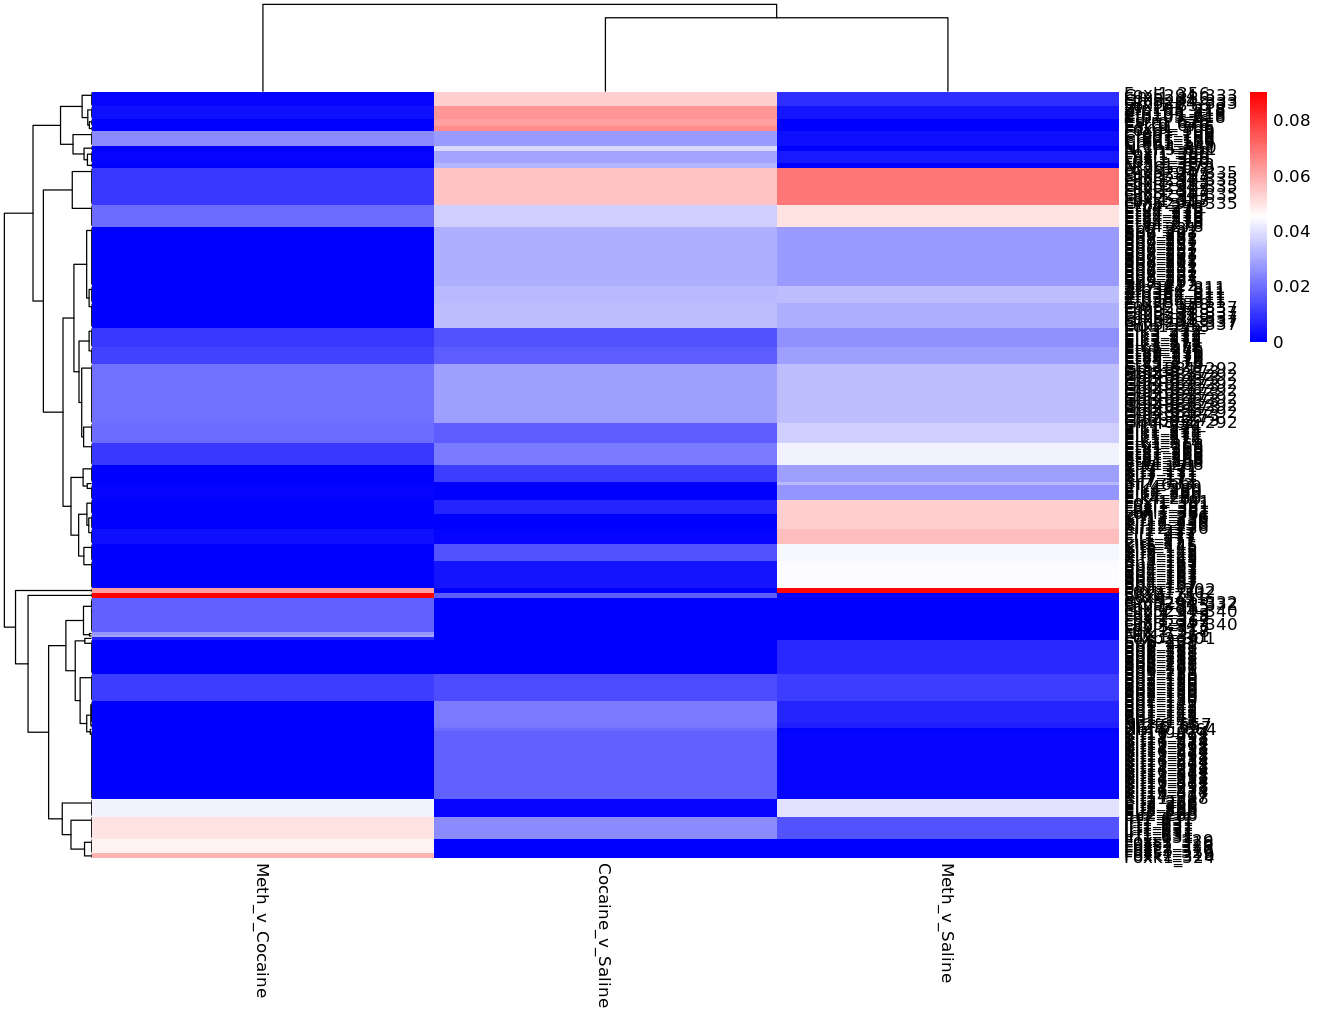

In [45]:
# Create a list to store data for each condition
condition_data <- list()

# Split the data into conditions
unique_conditions <- unique(shared_motifs_info$Condition)
for (condition in unique_conditions) {
  condition_data[[condition]] <- shared_motifs_info[shared_motifs_info$Condition == condition, c("name", "CellType", "FDR")]
}

# Create an empty heatmap matrix
heatmap_matrix <- matrix(nrow = nrow(shared_motifs_info), ncol = length(unique_conditions))

# Fill in the heatmap matrix with the mean FDR value for each motif and condition
for (i in 1:length(unique_conditions)) {
  condition <- unique_conditions[i]
  condition_df <- condition_data[[condition]]
  
  # Pivot the data to have cell types as sub-columns under each condition
  condition_matrix <- dcast(condition_df, name ~ CellType, value.var = "FDR")
  
  for (j in 1:nrow(shared_motifs_info)) {
    motif_name <- shared_motifs_info$name[j]
    fdr_values <- as.numeric(condition_matrix[condition_matrix$name == motif_name, -1])
    mean_fdr_value <- mean(fdr_values, na.rm = TRUE)
    heatmap_matrix[j, i] <- mean_fdr_value
  }
}

# Replace NA values with 0
heatmap_matrix[is.na(heatmap_matrix)] <- 0

# Set the row names (motif names) and column names (conditions)
rownames(heatmap_matrix) <- shared_motifs_info$name
colnames(heatmap_matrix) <- unique_conditions

# Create the heatmap using pheatmap
pheatmap(heatmap_matrix, cluster_rows = TRUE, cluster_cols = TRUE, color = colorRampPalette(c("blue", "white", "red"))(100))







In [36]:
motif_result <- combined_correlated_motifs %>% count(Condition, CellType,name)
head(motif_result)

Condition        CellType   name       n
1 Cocaine_v_Saline Astrocytes Foxj1_305  1
2 Cocaine_v_Saline Astrocytes Foxl1_357  1
3 Cocaine_v_Saline Astrocytes Gm5294_335 1
4 Cocaine_v_Saline Astrocytes Irf1_631   1
5 Cocaine_v_Saline Astrocytes Sp1_142    1
6 Cocaine_v_Saline Astrocytes Zfp105_218 1

In [37]:
saveDir = "/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/differential_Motifs_data"
path = file.path(saveDir, paste0('motifResult.rds'))
saveRDS(motif_result, path)

In [38]:
install.packages("writexl")  # Install the writexl package if not already installed
library(writexl)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [39]:
write_xlsx(motif_result, "/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/differential_Motifs_data/motifResult.xlsx")

In [6]:
motifs = sort(corr_matrix[corr_matrix$TFRegulator=="YES",2])
motifs_w_z = paste0('z:', motifs)
motifs_w_z

[1] "z:Creb1_109"  "z:Elf2_286"   "z:Elk1_274"   "z:Elk3_272"   "z:Elk4_280"  
 [6] "z:Esrrg_676"  "z:Ets2_828"   "z:Etv1_268"   "z:Etv4_278"   "z:Etv5_276"  
[11] "z:Fli1_277"   "z:Foxa1_306"  "z:Foxa2_307"  "z:Foxc2_316"  "z:Foxd4_833" 
[16] "z:Foxg1_299"  "z:Foxi1_317"  "z:Foxi2_318"  "z:Foxi3_323"  "z:Foxj1_305" 
[21] "z:Foxj2_298"  "z:Foxj3_303"  "z:Foxk1_324"  "z:Foxk2_310"  "z:Foxl1_355" 
[26] "z:Foxl1_356"  "z:Foxl1_357"  "z:Foxl1_358"  "z:Foxl1_361"  "z:Foxl1_362" 
[31] "z:Foxl1_380"  "z:Foxl1_381"  "z:Foxl2_832"  "z:Foxm1_880"  "z:Foxn2_830" 
[36] "z:Foxo4_313"  "z:Foxp1_302"  "z:Foxp2_301"  "z:Foxp3_311"  "z:Foxp4_300" 
[41] "z:Foxs1_329"  "z:Gabpa_273"  "z:Gm4881_292" "z:Gm5294_332" "z:Gm5294_333"
[46] "z:Gm5294_335" "z:Gm5294_337" "z:Gm5294_340" "z:Hnf4g_664"  "z:Irf1_631"  
[51] "z:Irf7_633"   "z:Klf11_798"  "z:Klf12_236"  "z:Klf13_817"  "z:Klf14_237" 
[56] "z:Klf16_874"  "z:Klf5_145"   "z:Klf7_171"   "z:Lhx5_471"   "z:Nfix_722"  
[61] "z:Nr1h4_850"  "z:Nr1h5_851"  "z:Nr2f6_657"  "z:Nr3c1_673"  "z:Rarg_654"  
[66] "z:Rxra_662"   "z:Sox4_751"   "z:Sp1_142"    "z:Sp2_150"    "z:Sp4_167"   
[71] "z:Sp5_238"    "z:Sp6_191"    "z:Sp7_222"    "z:Sp8_207"    "z:Sp9_231"   
[76] "z:Zfp105_218" "z:Zfp384_811"

In [ ]:
# cell_names = getCellColData(projM)
# names(cell_names)
projM$cluster_rat

In [7]:
p <- plotGroups(ArchRProj = projM, 
  groupBy = "cluster_rat", 
  colorBy = "MotifMatrix", 
  name = motifs_w_z,
  imputeWeights = getImputeWeights(projM),
  baseSize = 9
)

Getting ImputeWeights

Getting Matrix Values...

2023-05-08 19:44:41 : 

1 
2 
3 
4 
5 


ArchR logging to : ArchRLogs/ArchR-imputeMatrix-6021f1a91641a-Date-2023-05-08_Time-19-44-47.log
If there is an issue, please report to github with logFile!

Using weights on disk

1 of 2

2 of 2

Using weights on disk

1 of 2

2 of 2

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 




In [9]:
for (ii in 1:length(p)){
    
    filename = paste0("/figures/exploratory/differntial_expression/motif_", 
                      str_replace(names(p[ii]), 'z:', ''),'.pdf')
    pdf(file = filename,   # The directory you want to save the file in
    height = 6,
       width = 4) # The height of the plot in inches
    
    plot(p[[ii]])
    
    dev.off()
    
}

ERROR: Error in pdf(file = filename, height = 6, width = 4): cannot open file '/figures/exploratory/differntial_expression/motif_Creb1_109.pdf'
